## Generate Datasets

In [1]:
from sklearn.datasets import make_classification

In [11]:
import matplotlib.pyplot as plt 
import numpy as np

In [8]:
X,Y = make_classification(n_classes=2, n_samples=400,n_clusters_per_class=1, n_features=2, n_informative=2,n_redundant=0,random_state=3)

In [30]:
Y

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,

In [32]:
# Convert Y into -1 and 1
# Broadcasting
Y[Y==0] =-1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

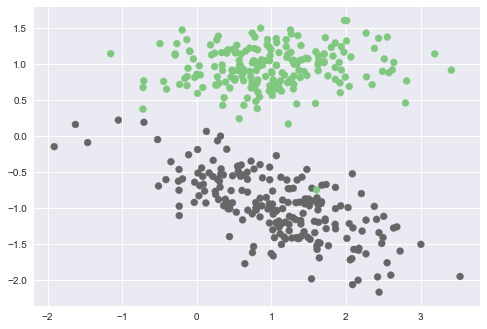

In [33]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Accent')

We can find hyperplane for this dataset

In [70]:
class SVM:
    def __init__(self,C=1.0):
        self.C =C
        # Weights
        self.W =0
        # bias
        self.b =0
    # Loss -->W,T
    def hingeLoss(self,W,b,X,Y):
        loss =0.0
        loss+=0.5 *np.dot(W,W.T)
        # Iterate over all examples
        m = X.shape[0]
        for i in range(m):
            ti = Y[i] * (np.dot(W,X[i].T))
            loss+= self.C * max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,batch_size=100,lr=0.001,max_itr=300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        n = lr
        C= self.C
        
        # initializing parameter
        W = np.zeros((1,no_of_features))
        bias = 0
        print(self.hingeLoss(W,bias,X,Y))
        
        # Training
        losses = []
        for i in range(max_itr):
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient
            for batch_start in range(0,no_of_samples,batch_size):
                # 0 gradient for batch
                gradw =0
                gradb =0
                # Iterate over all examples in mini batch
                for j in range(batch_size,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i] * (np.dot(W,X[i].T)+bias)
                        if ti<1:
                            gradw += C*Y[i]*X[i]
                            gradb += C*Y[i]
            W = W - n*W +n*gradw
            bias = bias + n*gradb
            
        self.W = W
        self.b = bias
            
        return W,bias,losses

In [71]:
mySVM = SVM()

In [72]:
W,b,losses = mySVM.fit(X,Y)

400.0


In [73]:
losses

[400.0,
 289.5941102220234,
 181.24319449860928,
 96.11055329065161,
 64.19304922554502,
 50.83943701432749,
 44.40753897816453,
 40.19843371974201,
 37.34145332989743,
 35.165096401723616,
 33.37989418965229,
 32.0542783146897,
 30.894083835698115,
 29.932282903685103,
 29.2200943871725,
 28.542912914552467,
 27.839877897883326,
 27.244647033056868,
 26.755596063416533,
 26.306104542111406,
 25.88561936230142,
 25.56292139262705,
 25.239617842717955,
 25.03343577161473,
 24.8284349863423,
 24.67681343604044,
 24.554657346288295,
 24.376446940076743,
 24.164557056290942,
 24.018131013656028,
 23.92687635739967,
 23.81244864063259,
 23.742197466710152,
 23.57827631618981,
 23.508789719076198,
 23.46186376283544,
 23.490842119060538,
 23.499815478463102,
 23.475962164207107,
 23.49936715134619,
 23.505858847288742,
 23.50991221438752,
 23.521805808478177,
 23.501639122700873,
 23.434382921147122,
 23.441333107535804,
 23.432345818915607,
 23.35244422913794,
 23.239484092367128,
 23.10326

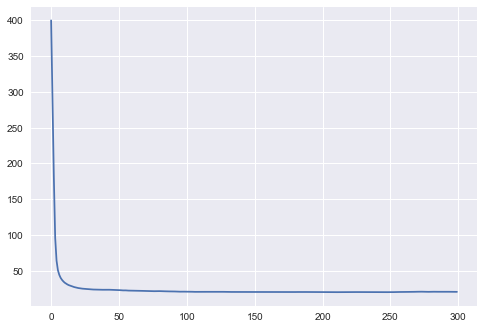

In [74]:
plt.plot(losses)
plt.show()

In [37]:
ids = np.arange(100)
np.random.shuffle(ids)
print(ids)

[40 10 45 32 83 64 74 69 46 97 85 82 86 72 28 23 11 22 61 24 59 36 80 63
 41 33 15 16  8 91  7 48  4 17 93  5 79 37 75 31 34 13 68 88 14 77 84 27
 98 55 56 58 20 96 99 25 26 44 50 42 29 81 89 52  2 76 51 21 12 49 95 39
 35 18 66 38  3 90 19 67 43 47 60 70 73 62 53 87  6 94 92 65  1  0  9 30
 54 71 57 78]


In [76]:
W,b,losses = mySVM.fit(X,Y,max_itr=100)
print(losses[0])
print(losses[-1])

400.0
400.0
21.02025216510631


In [77]:
print(W)

[[-0.34149968 -2.13945071]]


In [78]:
print(b)

0.39400000000000024


In [84]:
W[0][1]

-2.1394507064214516

In [86]:
def plotHyperPlane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    plt.plot(x_1,x_2)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap='Accent')
    plt.show()

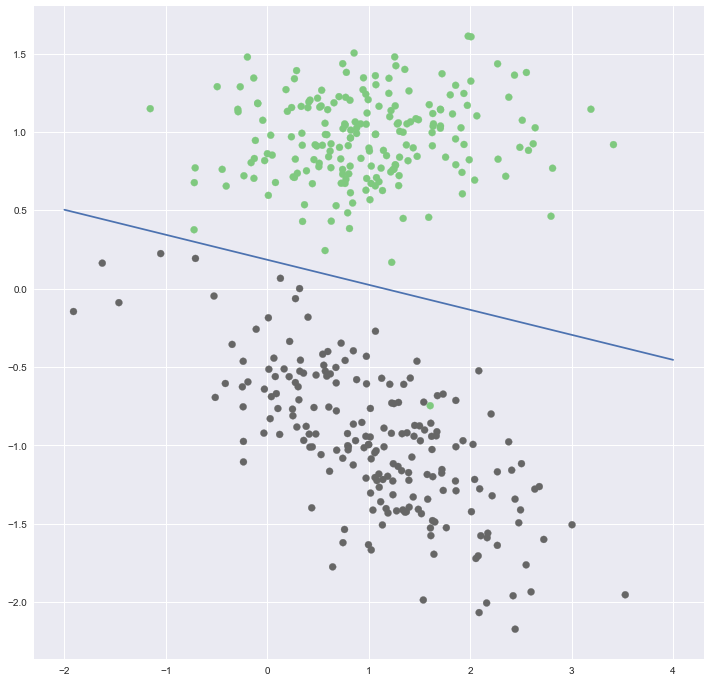

In [87]:
plotHyperPlane(W[0][0],W[0][1],b)

In [90]:
def plotHyperPlane(w1,w2,b):
    plt.figure(figsize=(12,10))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    x_p = -(w1*x_1+b+1)/w2
    x_n = -(w1*x_1+b-1)/w2
    
    plt.plot(x_1,x_2)
    plt.plot(x_1,x_p,label='Hyperplane WT+B=-1')
    plt.plot(x_1,x_n,label='Hyperplane WT+B=1')
    plt.scatter(X[:,0],X[:,1],c=Y,cmap='Accent',label='Hyperplane WT+B=0')
    plt.legend()
    plt.show()

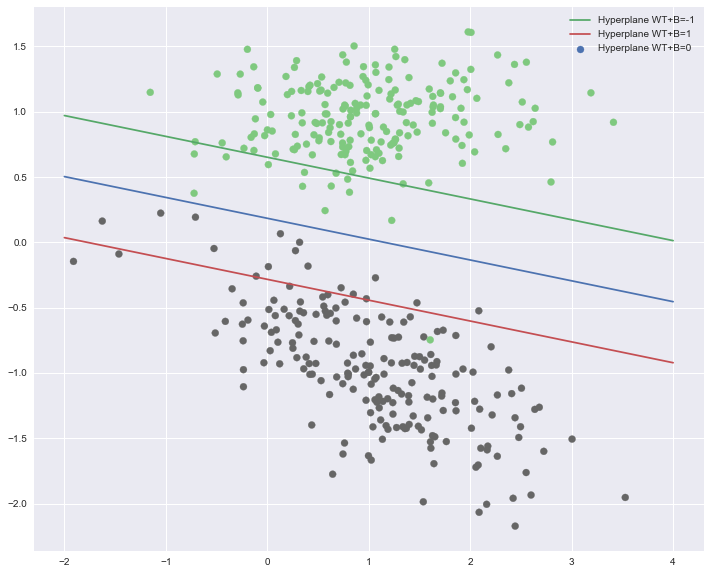

In [91]:
plotHyperPlane(W[0][0],W[0][1],b)

In [101]:
svm = SVM(C=100)
W,b,losses = svm.fit(X,Y,max_itr=100)
print(losses[0])
print(losses[-1])

40000.0
40000.0
2297.259741704174


In [102]:
print(W)
print(b)

[[ -6.2587757  -22.56187684]]
2.9000000000000004


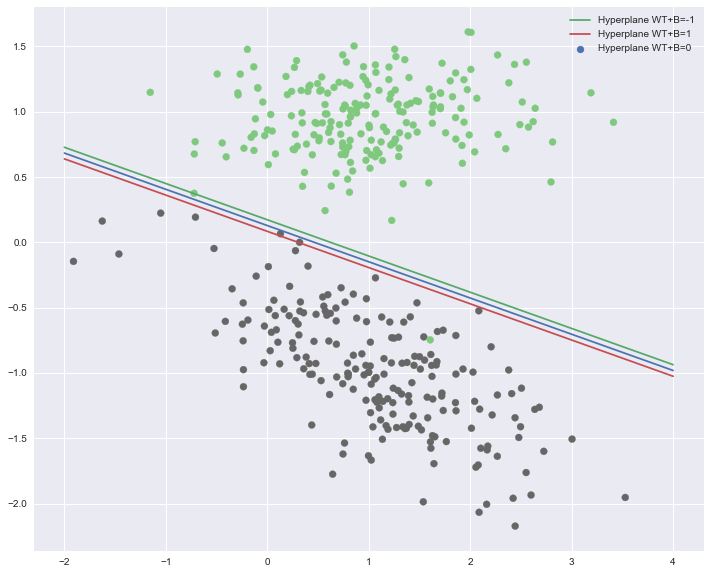

In [103]:
plotHyperPlane(W[0][0],W[0][1],b)

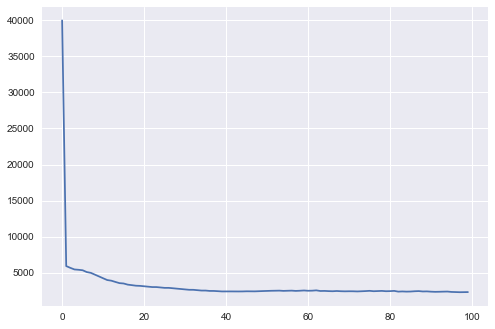

In [104]:
plt.plot(losses)
plt.show()